### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np

In [14]:
df = pd.read_csv('data/winequality-red.csv')

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
X = df.drop('quality', axis = 1)
y = df['quality']

<Axes: >

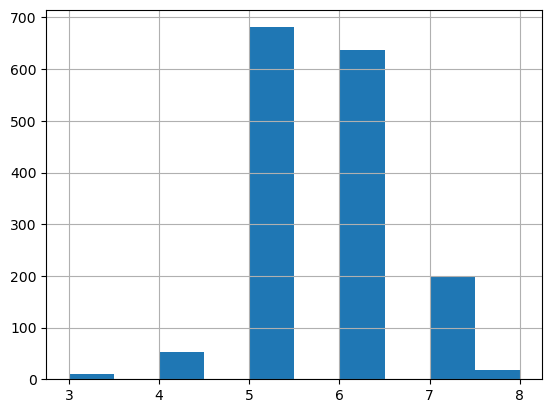

In [19]:
y.hist()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
# Create a sample dataset with 12 features and 1 target variable
X, y = make_regression(n_samples=100, n_features=12, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Ridge Regressor to extract coefficients

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


# Create a pipeline with StandardScaler and Ridge
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())  # Alpha will be determined by GridSearchCV
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # List of alpha values to try
}

# Create GridSearchCV instance
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best Ridge model from the grid search
best_ridge_model = grid_search.best_estimator_

# Print the best alpha value and its corresponding negative mean squared error
print("Best Alpha:", best_ridge_model.named_steps['model'].alpha)
print("Best Negative Mean Squared Error:", -grid_search.best_score_)

# Fit the best Ridge model on the full training set
best_ridge_model.fit(X_train, y_train)

# Get the coefficients of the Ridge model
coefficients = best_ridge_model.named_steps['model'].coef_

# Print the coefficients
print("Coefficients:", coefficients)

# Create a SelectFromModel instance using the best Ridge model
sfm_ridge = SelectFromModel(best_ridge_model.named_steps['model'], threshold=None)

# Transform the features using the Ridge-based feature selection
X_train_selected = sfm_ridge.transform(X_train)
X_test_selected = sfm_ridge.transform(X_test)

# Fit a new Ridge model on the selected features
ridge_selected = Ridge(alpha=best_ridge_model.named_steps['model'].alpha)
ridge_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = ridge_selected.predict(X_test_selected)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Alpha: 0.001
Best Negative Mean Squared Error: 1.7083661712356478e-05
Coefficients: [-2.25204448e-04  2.05369905e+01  3.93259160e-05  9.82402943e+01
  3.48511086e+00  9.44427443e+01  6.09919120e+01  2.08991653e+01
  5.95839227e+01  7.92101828e+01  5.70083165e+01  4.00762110e+01]
Mean Squared Error: 2369.8395031017762


In [46]:
# SequentialFeatureSelection using the Lasso to select 4 features

# Create a pipeline with StandardScaler, SequentialFeatureSelector, and Ridge
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfs', SequentialFeatureSelector(Lasso(), n_features_to_select=4, direction='forward')),
    ('model', Ridge())
])

# Define parameter grid for Ridge alpha
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Get the best score from the grid search
best_score = grid_search.best_score_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Best Model:", best_model)
print("Best Ridge Alpha:", best_model.named_steps['model'].alpha)
print("Best Score:", best_score)
print("Mean Squared Error:", mse)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('sfs',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4)),
                ('model', Ridge(alpha=1))])
Best Ridge Alpha: 1
Best Score: -8816.720145969577
Mean Squared Error: 7886.2821801264945


In [48]:
# RFE using Lasso to select 4 features

# Create a pipeline with StandardScaler, RFE, and Ridge
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=Lasso(), n_features_to_select=4)),
    ('model', Ridge())
])

# Define parameter grid for Ridge alpha
param_grid = {
    'model__alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Best Model:", best_model)
print("Selected Features (RFE):", selected_indices_rfe)
print("Best Ridge Alpha:", best_model.named_steps['model'].alpha)
print("Best Score:", grid_search.best_score_)
print("Mean Squared Error:", mse)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('rfe', RFE(estimator=Lasso(), n_features_to_select=4)),
                ('model', Ridge(alpha=10))])
Selected Features (RFE): [3 5 6 9]
Best Ridge Alpha: 10
Best Score: -10192.048894022322
Mean Squared Error: 8962.325488659855
